<a href="https://colab.research.google.com/github/ravi-kr/DeepLearning/blob/master/SOM_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
      

Saving iris.csv to iris.csv
User uploaded file "iris.csv" with length 3858 bytes


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
dataset = iris.drop(['species'],axis =1)
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
cleanDataSet = pd.DataFrame(standard.fit_transform(dataset))
cleanDataSet.head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [6]:
# numpy base SOM implementation 
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.5-cp36-none-any.whl size=8474 sha256=aee19a644e99ff14ef8d1e0180c8a0aee8b238be70e3e3fa99269b7f6a326cd9
  Stored in directory: /root/.cache/pip/wheels/39/5b/16/cc9402ffc58cafb1da6997e5c94b1bde65e8cb214907879fd4
Successfully built minisom


In [0]:
from minisom import MiniSom
from matplotlib.gridspec import GridSpec
som = MiniSom(7,7,4, sigma=0.25,neighborhood_function='gaussian')
som.train_random(cleanDataSet.to_numpy(),30000)

In [0]:
target = iris.species.astype('category').cat.codes
labels_map = som.labels_map(cleanDataSet.to_numpy(), target)
label_names = np.unique(target)

In [9]:
target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int8

In [10]:
labels_map

defaultdict(list,
            {(0, 0): Counter({0: 9}),
             (0, 1): Counter({0: 1}),
             (0, 2): Counter({0: 9}),
             (0, 4): Counter({1: 4}),
             (0, 5): Counter({1: 2}),
             (1, 0): Counter({0: 5}),
             (1, 1): Counter({0: 3}),
             (1, 2): Counter({0: 1}),
             (1, 4): Counter({2: 3}),
             (1, 5): Counter({2: 4}),
             (1, 6): Counter({1: 1}),
             (2, 0): Counter({0: 5}),
             (2, 1): Counter({0: 7}),
             (2, 2): Counter({0: 2}),
             (2, 3): Counter({1: 1}),
             (2, 4): Counter({2: 4}),
             (2, 5): Counter({2: 2}),
             (2, 6): Counter({2: 3}),
             (3, 0): Counter({0: 3}),
             (3, 1): Counter({0: 4}),
             (3, 2): Counter({0: 1}),
             (3, 3): Counter({1: 1}),
             (3, 4): Counter({1: 1, 2: 3}),
             (3, 5): Counter({2: 4}),
             (3, 6): Counter({1: 3, 2: 1}),
             (4, 0):

In [11]:
label_names

array([0, 1, 2], dtype=int8)

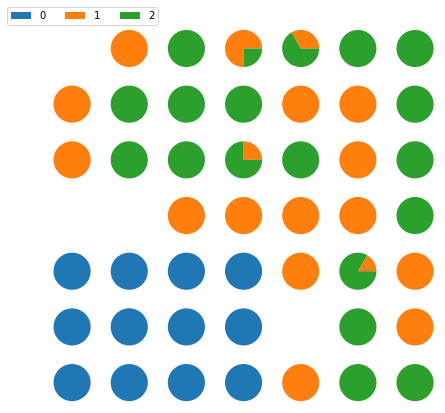

In [12]:
plt.figure(figsize=(7, 7))
the_grid = GridSpec(7, 7)

for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[6-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, bbox_to_anchor=(0, 1.5), ncol=3)

plt.show()

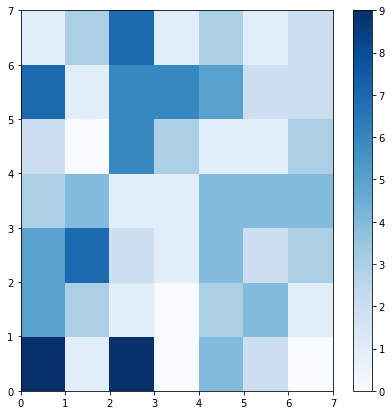

In [13]:
plt.figure(figsize=(7, 7))
frequencies = np.zeros((7, 7))
for position, values in som.win_map(cleanDataSet.to_numpy()).items():
    frequencies[position[0], position[1]] = len(values)
plt.pcolor(frequencies, cmap='Blues')
plt.colorbar()
plt.show()
